In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.externals import joblib

sns.set()

In [59]:
data = pd.read_csv("output\\4trainingdata.csv")

In [60]:
data.shape

(30, 3)

In [61]:
data["home_win"].describe()

count    30.000000
mean      0.700000
std       0.466092
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: home_win, dtype: float64

In [24]:
data[data["home_pct"] == data["away_pct"]]["home_win"].describe()

count    174.000000
mean       0.614943
std        0.488013
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: home_win, dtype: float64

In [25]:
data[data["away_pct"] == 1]["home_win"].mean()

0.0

In [26]:
data[data["home_pct"] > data["away_pct"]]["home_win"].describe()

count    363.000000
mean       0.969697
std        0.171656
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: home_win, dtype: float64

In [27]:
y = data.home_win

In [28]:
X = data.drop("home_win", axis=1, inplace=False)

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

def get_model_and_grid():

    #model = MLPClassifier()
    #param_grid = {    
    #}
    
    model = GaussianNB()
    param_grid = {
    }
    
    #model = DecisionTreeClassifier()

    #model = AdaBoostClassifier()
    #param_grid = {
    #    "learning_rate": [0.01, 0.1, 0.5, 1, 10],
    #    "n_estimators": [1, 10, 50, 100]
    #}

    #print("getting model")
    #
    #model = SVC()
    #
    #param_grid = {
    #    "C": [0.01, 0.1, 1, 10, 100],
    #    "kernel": ['linear', 'rbf']
    # }

    return model, param_grid

In [37]:
from sklearn.model_selection import GridSearchCV

model, param_grid = get_model_and_grid()

grid = GridSearchCV(model, param_grid, cv=5, return_train_score=True)

grid.fit(X, y)

#print(grid.best_params_)
#grid.cv_results_

print(grid.best_score_)

model = grid.best_estimator_

y_model = model.predict(X)

confidence = model.predict_proba(X)

joblib.dump(grid.best_estimator_, "output\\best_estimator.pkl")

0.874855156431


['output\\best_estimator.pkl']

In [38]:
def confidence_stats(interval):
    
    correct_count = 0
    total_count = 0
    
    for i,v in enumerate(y_model):
        if np.max(confidence[i]) >= interval:
            total_count += 1
            if y[i] == y_model[i]:
                correct_count += 1
    
    return correct_count, total_count, interval

def render_confidence(stats):
    print(stats[2], stats[0], stats[1], stats[0]/stats[1])

In [39]:
at_80 = render_confidence(confidence_stats(0.8))

at_90 = render_confidence(confidence_stats(0.9))

at_95 = render_confidence(confidence_stats(0.95))

0.8 648 689 0.9404934687953556
0.9 515 526 0.9790874524714829
0.95 394 394 1.0


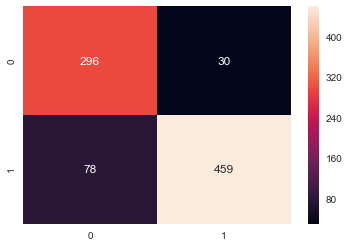

In [34]:
#sns.pairplot(data, hue='home_win')

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_true=y, y_pred=y_model)

sns.heatmap(mat.T, annot=True, fmt='d')

In [35]:
data.head()

,home_pct,away_pct,home_win
0,0.333333,0.666667,0
1,1.000000,0.333333,1
2,0.666667,0.666667,0
3,0.666667,0.333333,1
4,0.000000,0.666667,0


In [57]:
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

def evaluate(weeks_to_roll):
    data = pd.read_csv(f"output\\{weeks_to_roll}trainingdata.csv")
    
    y = data.home_win
    X = data.drop("home_win", axis=1, inplace=False)
    
    model = joblib.load(f"models\\{weeks_to_roll}_model.pkl")
    
    y_predicted = model.predict(X)
    
    accuracy = accuracy_score(y, y_predicted)
    f1 = f1_score(y, y_predicted)
    
    print(f"{weeks_to_roll} accuracy: {accuracy}")
    print(f"{weeks_to_roll} f1: {f1}" )
    
    with open(f"summary_{weeks_to_roll}.csv", 'w') as f:
        for i,v in enumerate(y):
            f.write(f"{y[i]},{y_predicted[i]}\n")

In [58]:
weeks = np.arange(2,6)

for w in weeks:
    evaluate(w)

2 accuracy: 0.9672131147540983
2 f1: 0.975609756097561
3 accuracy: 0.8888888888888888
3 f1: 0.9180327868852459
4 accuracy: 0.9
4 f1: 0.9268292682926829
5 accuracy: 0.8
5 f1: 0.8421052631578948


In [ ]:
weeks = np.arange